Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate 

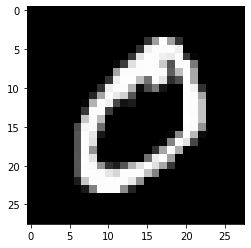

In [3]:
#Les librairies utilise
import os
import sklearn as sk
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

def build_model():
    """ Creation d'un model a partir du model keras"""
    my_model = Sequential()
    #input_shape est la creation de la premier couche
    #64 represente la creation de la premier couche
    my_model.add(Dense(64,input_shape=(784, ),activation='relu'))
    my_model.add(Dense(32,activation='selu'))
    my_model.add(Dense(32,activation='selu'))
    #Couche de sortie representer pas categorie  10= nombre de class'cad categorie'
    my_model.add(Dense(10,activation='softmax'))
    #Compilation du model qui prend en parametre la fonction a compile
    #loss permit definir le 
    my_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    print(my_model.summary())
    return my_model

#import data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
plt.imshow(X_train[1], cmap='gray')
#reshaping
X_train = X_train.reshape((X_train.shape[0], 28*28))/255#.shape
X_test = X_test.reshape((X_test.shape[0], 28*28))/255#.shape

#%%time
#Train our model
#Encoding
model_attut =build_model()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
model_attut.fit(X_train,Y_train, epochs=20 ,batch_size=32,validation_split=0.2)
